In [26]:
import os
import io
import zipfile
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)
import joblib

In [27]:
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"

def load_student_data():
    try:
        r = requests.get(DATA_URL)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        df = pd.read_csv(z.open('student-mat.csv'), sep=';')
        print("Loaded student-mat.csv from UCI repository.")
        return df
    except Exception as e:
        print("Download failed:", e)
        if os.path.exists('student-mat.csv'):
            print("Loading local student-mat.csv")
            return pd.read_csv('student-mat.csv', sep=';')
        else:
            raise FileNotFoundError("Dataset not found. Please download student-mat.csv to working directory.")

df = load_student_data()
df.head()

Loaded student-mat.csv from UCI repository.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [28]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nInfo:")
df.info()
print("\nDescription (numeric columns):")
display(df.describe().T)

Shape: (395, 33)

Columns:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardia

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [29]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


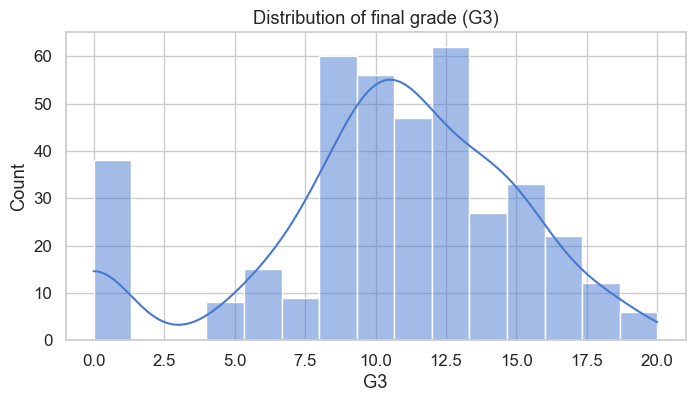

In [30]:
plt.figure(figsize=(8,4))
sns.histplot(df['G3'], bins=15, kde=True)
plt.title("Distribution of final grade (G3)")
plt.xlabel("G3")
plt.show()

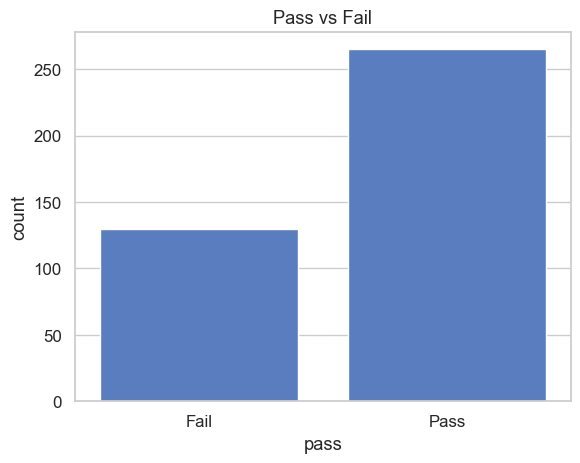

In [31]:
df['pass'] = (df['G3'] >= 10).astype(int)
sns.countplot(x='pass', data=df)
plt.xticks([0,1], ['Fail', 'Pass'])
plt.title("Pass vs Fail")
plt.show()

Using numeric columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'pass']


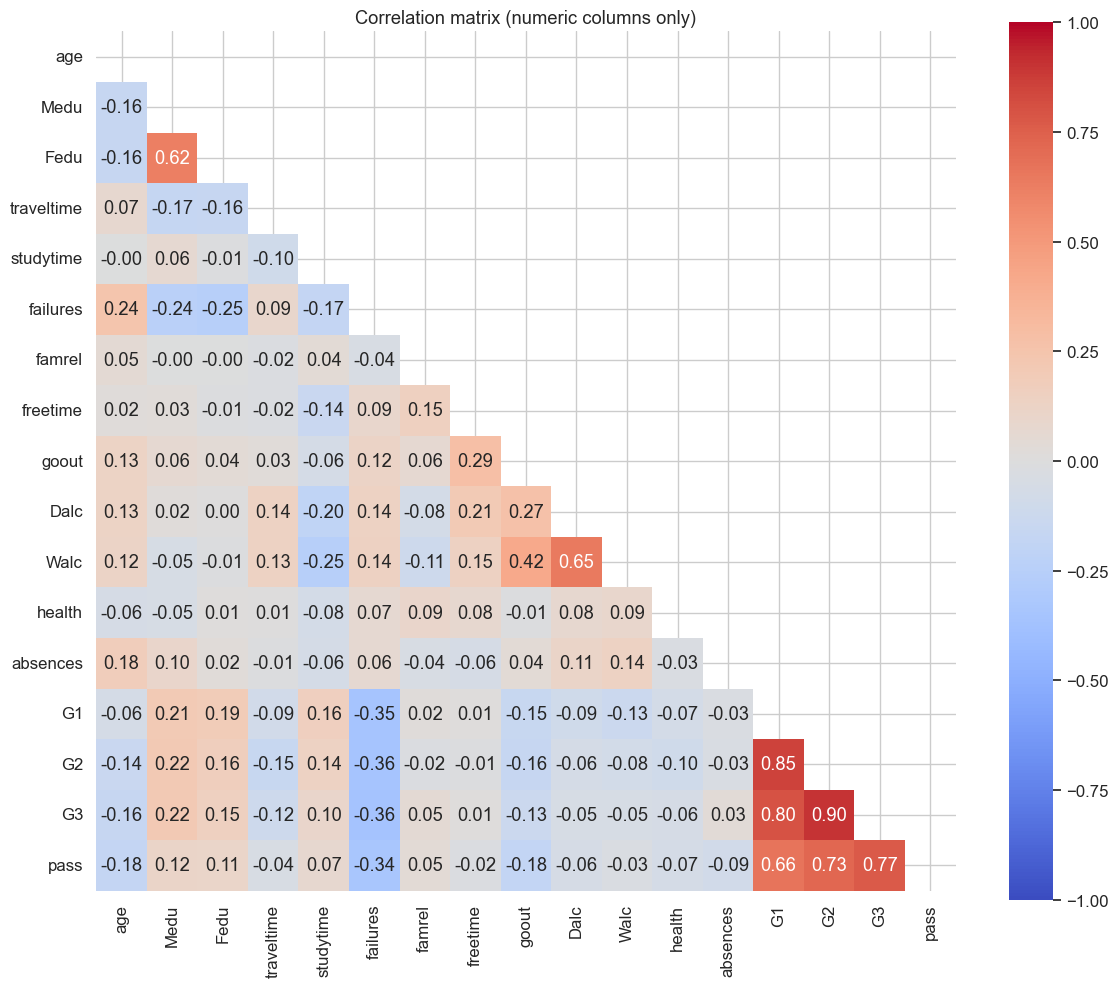

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=[np.number])
print("Using numeric columns:", list(numeric_df.columns))

corr = numeric_df.corr()
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title("Correlation matrix (numeric columns only)")
plt.tight_layout()
plt.show()


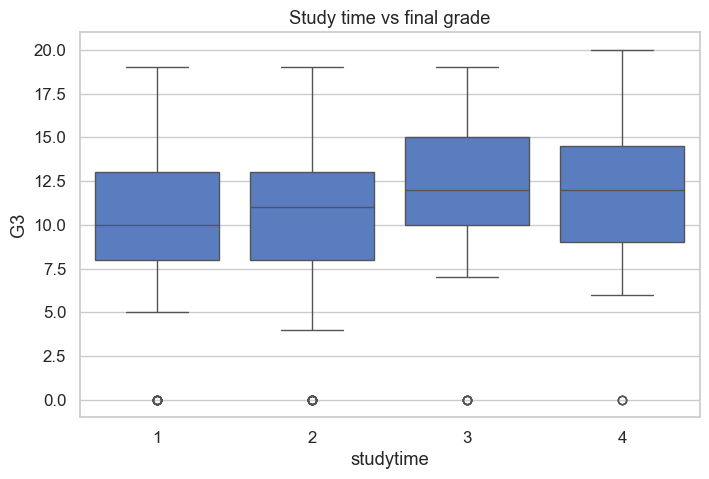

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Study time vs final grade")
plt.show()

In [35]:
data = df.copy()
binary_cols = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
for col in binary_cols:
    if col in data.columns:
        data[col] = data[col].map({'yes':1, 'no':0})
data = pd.get_dummies(data, drop_first=True)

print("Processed shape:", data.shape)

Processed shape: (395, 43)


In [36]:
USE_G1_G2 = True  

target = 'G3'
features = data.drop(columns=['pass'])  # we will use pass separately for classification

if not USE_G1_G2:
    features = features.drop(columns=['G1','G2'])
X = features.drop(columns=[target])
y_reg = features[target]  # regression target
y_clf = (y_reg >= 10).astype(int)  # classification target

print("Features shape:", X.shape)

Features shape: (395, 41)


In [37]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

_, _, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (316, 41) Test shape: (79, 41)


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_reg)
y_pred_lr = lr.predict(X_test_scaled)

def reg_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

print("Linear Regression metrics:")
print(reg_metrics(y_test_reg, y_pred_lr))

Linear Regression metrics:
{'MAE': 1.6466656197147511, 'MSE': 5.656642833231225, 'RMSE': np.float64(2.3783697847961376), 'R2': 0.7241341236974019}


In [16]:
rfr = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rfr = GridSearchCV(rfr, param_grid, cv=4, scoring='r2', n_jobs=-1, verbose=1)
grid_rfr.fit(X_train, y_train_reg)  # tree models don't require scaling

print("Best params:", grid_rfr.best_params_)
best_rfr = grid_rfr.best_estimator_

y_pred_rfr = best_rfr.predict(X_test)
print("Random Forest metrics:")
print(reg_metrics(y_test_reg, y_pred_rfr))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest metrics:
{'MAE': 1.1642580222546148, 'MSE': 3.7703088153028284, 'RMSE': np.float64(1.9417283062526611), 'R2': 0.8161277676655444}


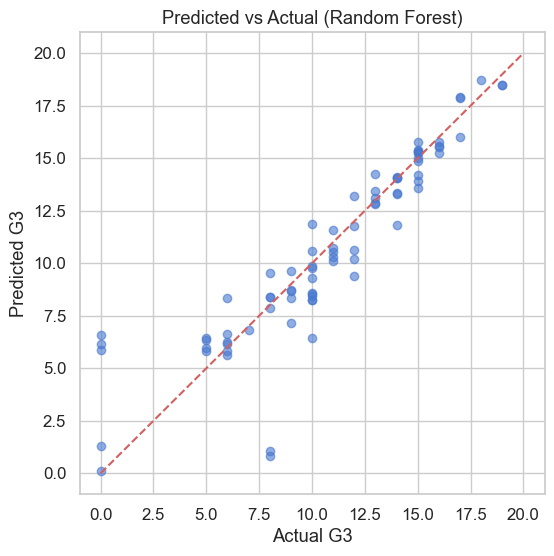

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_reg, y_pred_rfr, alpha=0.6)
plt.plot([0,20],[0,20],'r--')  # ideal line
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Predicted vs Actual (Random Forest)")
plt.show()

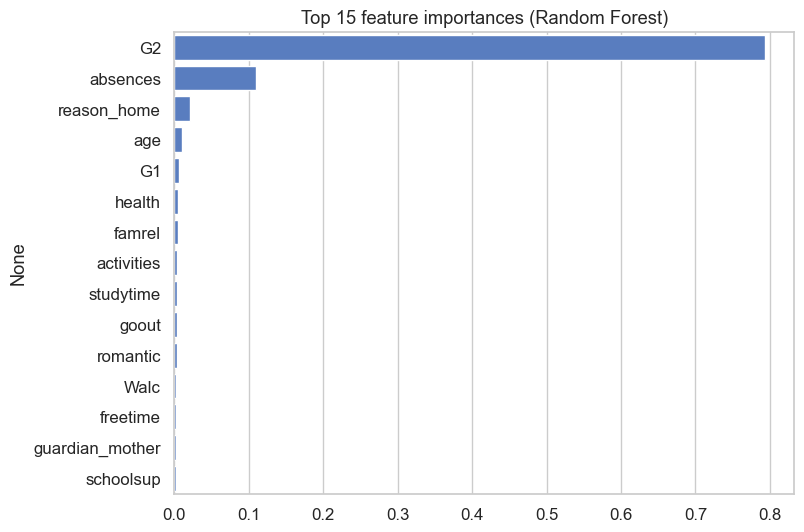

In [18]:
importances = pd.Series(best_rfr.feature_importances_, index=X.columns)
top_imp = importances.sort_values(ascending=False).head(15)
plt.figure(figsize=(8,6))
sns.barplot(x=top_imp.values, y=top_imp.index)
plt.title("Top 15 feature importances (Random Forest)")
plt.show()

In [39]:
logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.fit(X_train_scaled, y_train_clf)
y_pred_log = logreg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test_clf, y_pred_log))
print("Classification report:\n", classification_report(y_test_clf, y_pred_log))

Logistic Regression Accuracy: 0.8987341772151899
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.94      0.90      0.92        52

    accuracy                           0.90        79
   macro avg       0.88      0.90      0.89        79
weighted avg       0.90      0.90      0.90        79



In [20]:
rfc = RandomForestClassifier(random_state=42)
param_grid_clf = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5]
}
grid_rfc = GridSearchCV(rfc, param_grid_clf, cv=4, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rfc.fit(X_train, y_train_clf)
best_rfc = grid_rfc.best_estimator_
y_pred_rfc = best_rfc.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test_clf, y_pred_rfc))
print("Classification report:\n", classification_report(y_test_clf, y_pred_rfc))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Random Forest Classifier Accuracy: 0.9240506329113924
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.98      0.90      0.94        52

    accuracy                           0.92        79
   macro avg       0.91      0.93      0.92        79
weighted avg       0.93      0.92      0.93        79



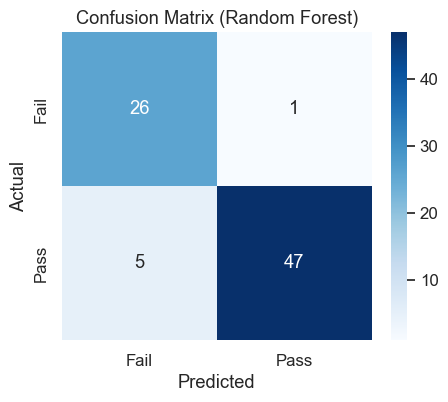

In [21]:
cm = confusion_matrix(y_test_clf, y_pred_rfc)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail','Pass'], yticklabels=['Fail','Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [22]:
joblib.dump(best_rfr, 'best_rfr_student.pkl')
joblib.dump(best_rfc, 'best_rfc_student.pkl')
joblib.dump(scaler, 'scaler_student.pkl')
print("Models saved to disk.")

Models saved to disk.


In [40]:
loaded_rf_reg = joblib.load('best_rfr_student.pkl')

sample = X_test.iloc[:5]
preds = loaded_rf_reg.predict(sample)
print("Sample predictions (regression):", preds)
print("Actual G3:", list(y_test_reg.iloc[:5]))

Sample predictions (regression): [ 8.238      11.76672619  6.45        9.758941    8.7072549 ]
Actual G3: [10, 12, 5, 10, 9]
